In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [10]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)
hide_toggle()

## Data Download
we obtain the data (no longer need to data clean :D )

In [12]:
df_merged = pd.read_csv("Data/AQ_CS_All_Full.csv")
df_merged.columns

Index(['MeasurementDateGMT', 'Measurement', 'SiteCode', 'LocalAuthorityCode',
       'LocalAuthorityName', 'SiteName', 'SiteType', 'DateOpened',
       'DateClosed', 'Latitude', 'Longitude', 'SpeciesType', 'ID', 'DateTime',
       'Date', 'Time', 'SatMean', 'SatBand', 'FlowMean', 'DateTimeStr', 'date',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'wind_speed_10m (km/h)', 'wind_direction_10m (°)'],
      dtype='object')

In [13]:
df_merged.drop(["date", "DateTimeStr", "Time","LocalAuthorityName","SatBand","SiteType","SiteName", "DateOpened", "DateClosed", "DateTime", "Latitude", "Longitude", "LocalAuthorityCode", "ID", "Date"], axis = 1, inplace= True)

## Obtain the dfs for each particulate
Subsequently, we get our array of each df, filtered by the respecive particulate type

In [14]:
particulates = ["NO2", "SO2", "PM10", "PM25"]
particulate_dfs = [df_merged[df_merged["SpeciesType"] == i] for i in particulates]

TypeError: Could not convert ST8LW4BT8CR7NB1WACLB5ST5LW1RB4EA6GN5CR5SK5WA9CT3NM3WM0CD9BX2EN7BX1LB6BY7WAALH0BG2EA8IS2ST4HR2GR7GN4WA8MY1LB4LW2HG1BT5BG1RB7WM5BL0HV3GR9WA2EN1IM1HG4EN4GR8GN3WABST6RI2HK6RHGCD1BT4TH2EI1WM6GR4KT4BQ7EN5NM2WA7IS6CR9ME9HV1TH4CT6HR1BT6CT4SK6GN0HI0GB6RI1KC1 to numeric

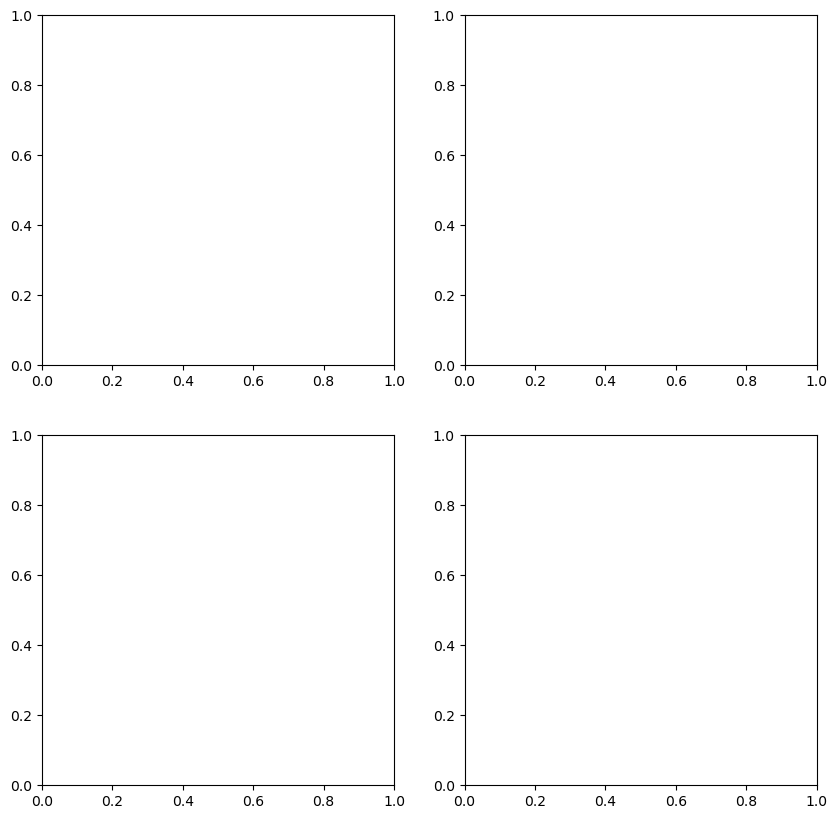

In [15]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,10))
for i in range(len(particulate_dfs)):
    df_i = particulate_dfs[i]
    sns.regplot( y = df_i.groupby("MeasurementDateGMT").mean()["Measurement"] , 
                x = df_i.groupby("MeasurementDateGMT").mean()["FlowMean"], 
                ax = axs[math.floor(i/2)][i%2],line_kws={"color": "C1"})
    axs[math.floor(i/2), i%2].set(xlabel = "FlowMean", ylabel = particulates[i])

    

Interestingly, we can note here a strong linear correlation between NO and traffic, and weak linear correlation between SO and traffic, PM10 and traffic, with the weakest for PM25 and traffic.

The approximately equal amount of points above and below the line suggests strong seasonality effects that need to be adjusted for.

TypeError: Could not convert ST8LW4BT8CR7NB1WACLB5ST5LW1RB4EA6GN5CR5SK5WA9CT3NM3WM0CD9BX2EN7BX1LB6BY7WAALH0BG2EA8IS2ST4HR2GR7GN4WA8MY1LB4LW2HG1BT5BG1RB7WM5BL0HV3GR9WA2EN1IM1HG4EN4GR8GN3WABST6RI2HK6RHGCD1BT4TH2EI1WM6GR4KT4BQ7EN5NM2WA7IS6CR9ME9HV1TH4CT6HR1BT6CT4SK6GN0HI0GB6RI1KC1 to numeric

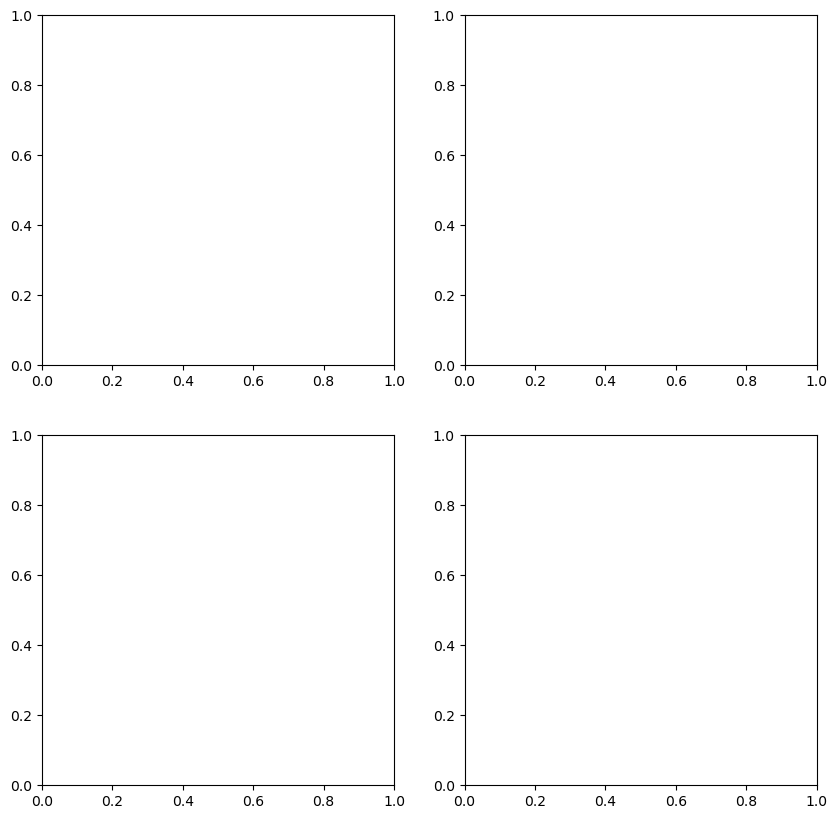

In [6]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,10))
for i in range(len(particulate_dfs)):
    df_i = particulate_dfs[i]
    sns.lineplot( y = df_i.groupby("MeasurementDateGMT").mean()["Measurement"] , 
                 x = np.linspace(1,2161, 2161), ax = axs[math.floor(i/2)][i%2])
    axs[math.floor(i/2), i%2].set(xlabel = "hours from initial measurement"
                                  , ylabel = particulates[i])

Examining the time series for the particulates, we will note that any particulate strongly linked to congestion will be storngly linked to commuting, and hence should be expected to show high seasonality wrt to a daily cycle.

Again, NO has the highest variance wrt to a small periodicity. SO shows strong seasonal drift, which might be evidence of a longer-period seasonality we don't have the data for. PM10 and PM25 are reasonably periodically seasonal, but have strong outliers

[Text(0.5, 0, 'hours since first measurements'), Text(0, 0.5, 'mean flow')]

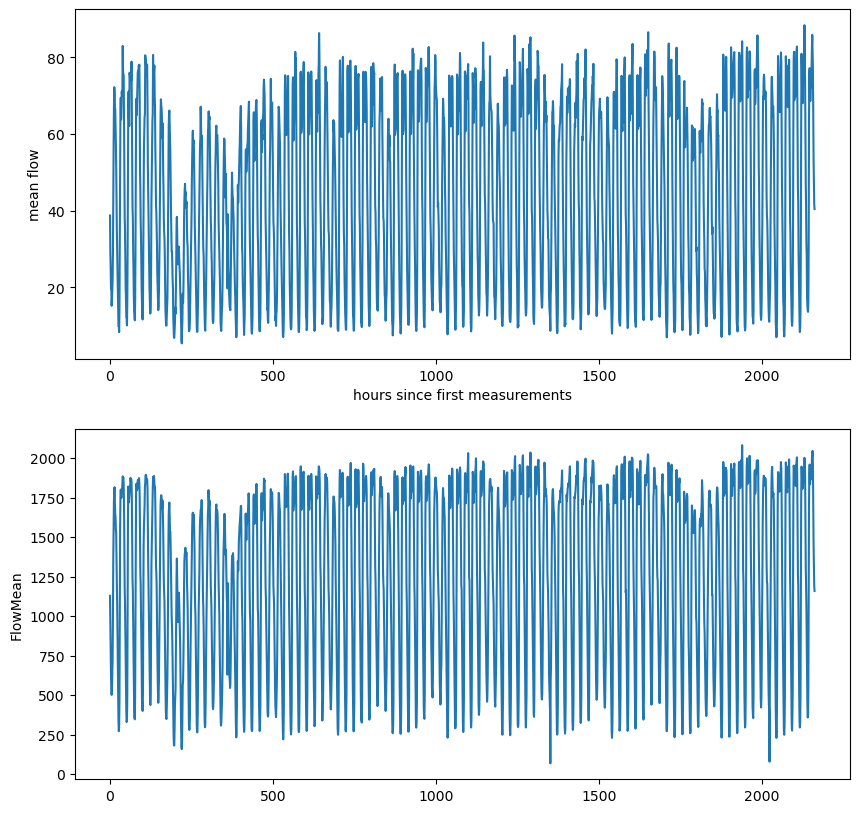

In [474]:
fig, axs = plt.subplots(nrows = 2, figsize = (10,10))
sns.lineplot( y = df_merged.groupby("MeasurementDateGMT").mean()["SatMean"] , 
                x = np.linspace(1,2161, 2161), ax = axs[0])
axs[0].set(xlabel = "hours since first measurements", ylabel = "sat rate")
sns.lineplot( y = df_merged.groupby("MeasurementDateGMT").mean()["FlowMean"] , 
                x = np.linspace(1,2161, 2161), ax = axs[1])
axs[0].set(xlabel = "hours since first measurements", ylabel = "mean flow")

We note here the very obvious weekly period of flowmean, with a dropoff near the second week due to some holiday? idk

## Obtaining the spatial correlaion

<AxesSubplot:xlabel='SiteCode', ylabel='SiteCode'>

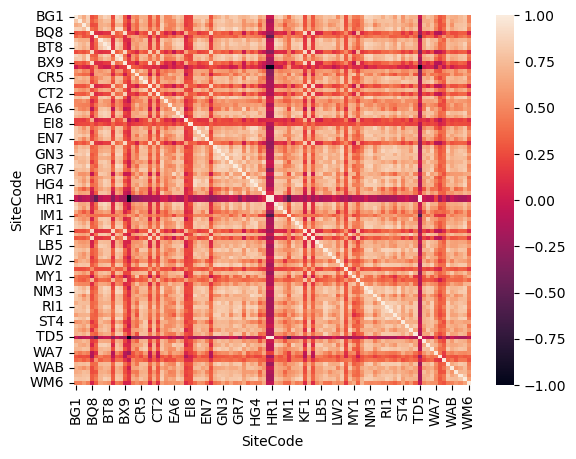

In [477]:
site_measurements  = df_merged.loc[:,["MeasurementDateGMT","Measurement", "SiteCode"]]
site_measurements.drop_duplicates(subset=['MeasurementDateGMT','SiteCode'], inplace=True)
site_measurements = site_measurements.pivot(index='MeasurementDateGMT', columns='SiteCode', values='Measurement')
sns.heatmap(site_measurements.corr())

this tells us that measurement sites generally have decent linear correlation with each other, with the exception of a dark band around HR1. Would be good to investigate why that is ....

A good idea for a more sophisticated spatial correlation analysis is to do one based on pairwise distances between spots; or one based on radius and bearing (to support our hypothesis that this is meaningful to do).

## Temporal Correlations

<AxesSubplot:>

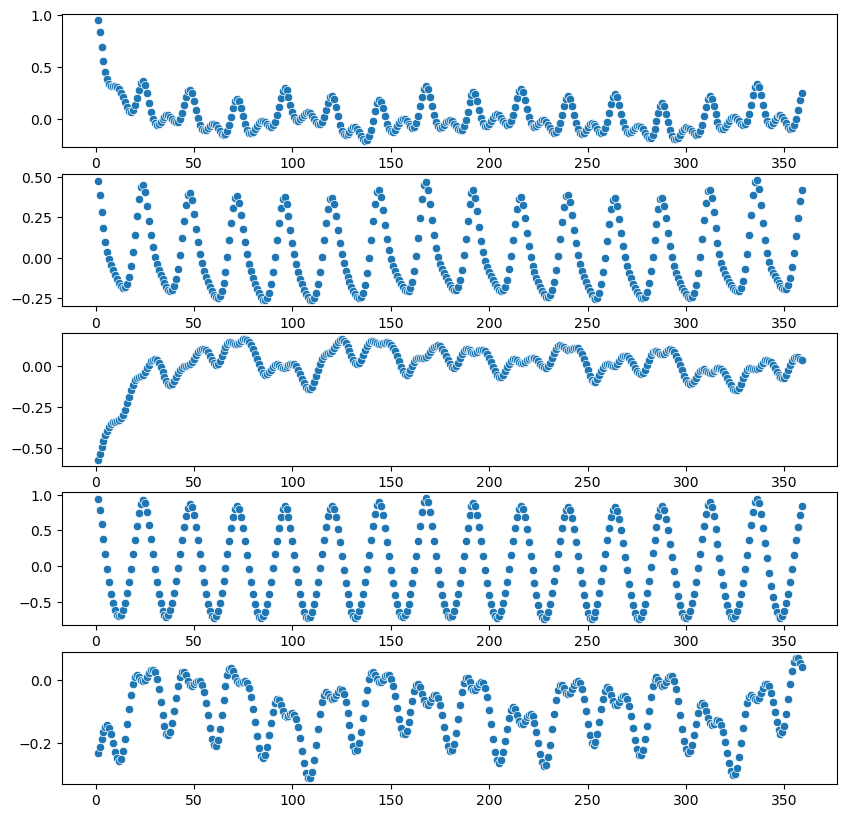

In [527]:
fig, axs = plt.subplots(nrows = 5, figsize = (10,10))
df_no = particulate_dfs[0]
df_no = df_no.groupby("MeasurementDateGMT").mean()["Measurement"].shift(periods = 9)
autocorrs = [df_no.autocorr(lag = i) for i in np.arange(1, 360)]
sns.scatterplot(y = autocorrs, x = np.arange(1, 360), ax = axs[0] )
df_no = particulate_dfs[0].groupby("MeasurementDateGMT").mean().loc[:,["Measurement", "FlowMean"]].shift(periods = 9)
corrs = [df_no["Measurement"].corr(df_no["FlowMean"].shift(periods = i)) for i in np.arange(1,360)]
sns.scatterplot(y = corrs, x = np.arange(1, 360), ax = axs[1] )
df_no = particulate_dfs[0].groupby("MeasurementDateGMT").mean().loc[:,["Measurement", "wind_speed_10m (km/h)"]].shift(periods = 9)
corrs = [df_no["Measurement"].corr(df_no["wind_speed_10m (km/h)"].shift(periods = i)) for i in np.arange(1,360)]
sns.scatterplot(y = corrs, x = np.arange(1, 360), ax = axs[2] )
df_no = particulate_dfs[0].groupby("MeasurementDateGMT").mean().loc[:,"FlowMean"].shift(periods = 9)
autocorrs = [df_no.autocorr(lag = i) for i in np.arange(1, 360)]
sns.scatterplot(y = autocorrs, x = np.arange(1, 360), ax = axs[3] )
df_no = particulate_dfs[0].groupby("MeasurementDateGMT").mean().loc[:,["Measurement", "temperature_2m (°C)"]].shift(periods = 9)
corrs = [df_no["Measurement"].corr(df_no["temperature_2m (°C)"].shift(periods = i)) for i in np.arange(1,360)]
sns.scatterplot(y = corrs, x = np.arange(1, 360), ax = axs[4] )


Here we see that an autoregressive model might unfortunately be necessary for the temporal aspect of this. We note that autoregression on no shows a slight weekly cycle, and a strong 24 hour cycle (with a smaller peak around the 36 hour mark, essentially the correlation of evening rush hour with morning rush hour, presumably). The fact that autocorrelation is still lower than something like flowmean suggests there's a significant amount of latent factors influencing this.

As a note, around 3 time steps of lag gives us decent correlation (3 hours) between past and present.

We have a surprisingly strong relationship between flowmean and NO (the second graph). We have the same 24 hour seasonality, with a weaker, 7-day seasonality. Interestingly, there's a negative correlation between (presumably) the evening/morning rush hour with the evening/morning rush hour in the data. From earlier graphs we note that evening and morning rush hour have about the same magnitude. This suggests there's another process dampening NO in the second peak of the rush hour, causing this negative correlation.

The third graph shows that wind speed is quite strongly *negatively* correlated with no for about 3 - 5 hours, after which it rapidly dropss off in importance.

The fourth graph shows the expected extremely strong autocorrelation of traffic.

As expected temperatre is a weak factor here.

### Conclusion

Probably create a lag-feature for wind; consider autoregressive modelling.

## PLS
We begin by contruscting the data matrix. We rescale by feature (although I note that previous attempts without rescaling were about as equally effective)

In [8]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = particulate_dfs[0].groupby("MeasurementDateGMT").mean()
columns = data.columns.values
data.dropna(inplace = True)
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = columns)

TypeError: Could not convert ST8LW4BT8CR7NB1WACLB5ST5LW1RB4EA6GN5CR5SK5WA9CT3NM3WM0CD9BX2EN7BX1LB6BY7WAALH0BG2EA8IS2ST4HR2GR7GN4WA8MY1LB4LW2HG1BT5BG1RB7WM5BL0HV3GR9WA2EN1IM1HG4EN4GR8GN3WABST6RI2HK6RHGCD1BT4TH2EI1WM6GR4KT4BQ7EN5NM2WA7IS6CR9ME9HV1TH4CT6HR1BT6CT4SK6GN0HI0GB6RI1KC1 to numeric

In [546]:
X = data.iloc[:,1:]
X

,SatMean,FlowMean,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),wind_direction_10m (°)
0,-0.257887,-0.239363,-1.581170,1.111856,-0.797389,1.268628
1,-0.663356,-0.584879,-1.581170,1.111856,-1.107129,1.132931
2,-0.829704,-0.890601,-1.896485,1.199935,-0.785476,1.065083
3,-1.053191,-1.120577,-1.843932,1.288015,-0.987998,0.985927
4,-1.048769,-1.265698,-1.975313,1.376094,-0.702084,0.929386
...,...,...,...,...,...,...
2156,0.738532,0.653387,0.179337,0.495299,-1.130955,-1.185223
2157,0.224643,0.236427,-0.004596,0.759538,-1.202434,-0.913829
2158,-0.066631,0.033616,-0.135977,1.023776,-1.261999,-1.185223
2159,-0.215096,-0.216445,-0.109701,1.199935,-0.439996,-1.422692


In [547]:
Y = data.iloc[:,0]
Y

0       0.649236
1       0.561196
2       0.302981
3       0.003407
4      -0.216951
          ...   
2156    2.361936
2157    1.563519
2158   -0.022582
2159   -0.597624
2160    0.014582
Name: Measurement, Length: 2161, dtype: float64

Below is a nifty function i copy pasted that tests best possible number of components

In [554]:
{
    "tags": [
        "hide-cell",
    ]
}
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/n_comp
        # Trick to update status on the same line
        print("\r%d%% completed" % comp)
    print("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    print("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted NO2')
        plt.ylabel('Measured NO2')
 
        plt.show()
 
    return
hide_toggle()

And fit ...


33% completed

50% completed

66% completed

83% completed

100% completed


Suggested number of components:  5




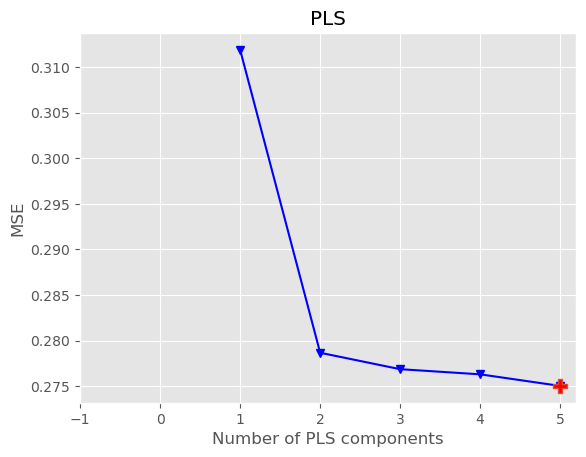

R2 calib: 0.746
R2 CV: 0.725
MSE calib: 0.254
MSE CV: 0.275


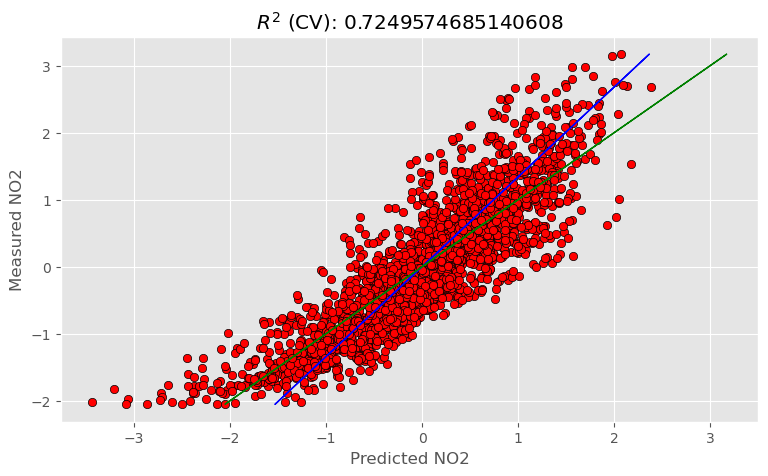

In [555]:
optimise_pls_cv(X,Y, 6)

This tells us that 5 is the optimal number of components for our linear model. I'll note her not great MSE of about 10% each way above and below the regression line, probably caused by temporal fluctuation primarily (since we regress time away), and to a lesser extent spatial.

In [556]:
pls = PLSRegression(n_components=5)
pls.fit(X, Y)
y_cv = cross_val_predict(pls, X, Y, cv=10)
 
# Calculate scores
score = r2_score(Y, y_cv)
mse = mean_squared_error(Y, y_cv)

First we plot the coefficients, which tells us the relative (standardized) importance of each feature

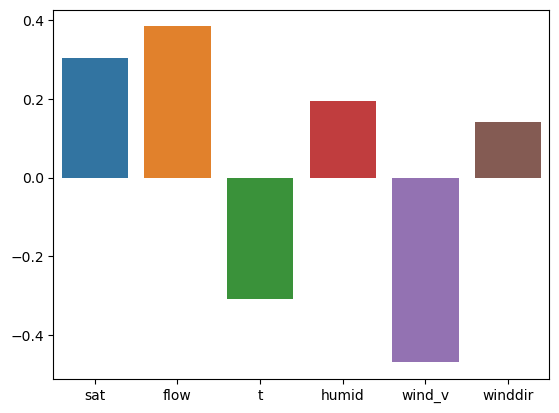

In [558]:
fig= sns.barplot(y = pls.coef_.transpose()[0], x = ["sat", "flow", "t", "humid","wind_v","winddir"])